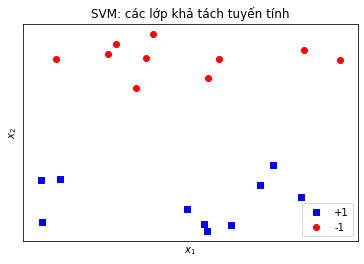

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# data size (each class)
N = 10

# generate original data
X_1_data_1 = np.random.uniform(2,3,N)
X_1_data_2 = (-X_1_data_1/2 + 5) - np.random.uniform(0.75,3,N)
X_2_data_1 = np.random.uniform(2,3,N)
X_2_data_2 = (-X_2_data_1/2 + 5) + np.random.uniform(0.75,3,N)
t_1_data = np.array([1 for i in range(N)])
t_2_data = np.array([-1 for i in range(N)])
X_data_1 = np.hstack((X_1_data_1,X_2_data_1))
X_data_2= np.hstack((X_1_data_2,X_2_data_2))

# setting the plot
fig, ax = plt.subplots()
ax.set_title('SVM: các lớp khả tách tuyến tính')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xticks(())
ax.set_yticks(())

# plot the original data
ax.scatter(X_1_data_1, X_1_data_2, label='+1', marker='s', c='b')
ax.scatter(X_2_data_1, X_2_data_2, label='-1', c='r')
ax.legend()
plt.show()

In [6]:
# get transformed data
def getTransformedData(X, Y, N, M):
    X_data = np.empty((0,M))
    t_data = np.array([])
    for i in range(2):
        X_data = np.vstack((X_data, transformClassData(X[i], Y[i], N, M)))
    t_data = np.hstack((t_data, [1 for i in range(N)]))
    t_data = np.hstack((t_data, [-1 for i in range(N)]))
    return X_data, t_data.reshape(2*N,1)

# transform data of one class
def transformClassData(X, Y, N, M):
    res = np.empty((0,M))
    for i in range(N):
        res = np.vstack((res, getTransformedFeature(X[i], Y[i], M)))
    return res

# transform each row of data
def getTransformedFeature(x, y, M):
    res = np.array([])
    count = 0
    exp_1 = 0
    exp_2 = 0
    while(True):
        res = np.append(res, (x**exp_1)*(y**exp_2))
        count += 1
        if (count == M):
            break
        else:
            exp_1 -= 1
            if (exp_1 == -1):
                exp_1 = exp_2 + 1
                exp_2 = 0
            else:
                exp_2 += 1
    return res

# predict function
def predict(X, Y, w, b, M):
    N = len(X[0])
    Z = np.empty((0,N))
    for x,y in zip(X,Y):
        X_ = transformClassData(x, y, N, M-1)
        z = np.dot(X_,w) + b
        z[z > 0] = 1
        z[z < 0] = -1
        Z = np.vstack((Z,z.T))
    return Z

# calculating linear boundary
def getBoundaryY(X, M, w, b, line_index):
    Y = np.array([])
    if (M == 4):
        for x in X:
            y = (line_index - b - np.dot(w[:2].T, np.array([[1],[x]])))/w[2]
            Y = np.append(Y, y)
    return Y

In [7]:
# feature size
M = 4

# get transformed data
X_ = np.vstack((X_1_data_1,X_2_data_1))
Y_ = np.vstack((X_1_data_2,X_2_data_2))
(X_data, t_data) = getTransformedData(X_, Y_, N, M-1)

# Primal Problem

||Primal Problem|CVXOPT Format|
|-|-|-|
||$$w^{*},b^{*}=argmin_{w,b}\frac{1}{2}||w||^{2}$$|$$x^{*}=argmin_{x}\frac{1}{2}x^{T}Kx+p^{T}x$$|
|s.t|$$-t_{n}(w^{T}x_{n}+b)\leq-1$$ $$\forall n = 1,2,...,N$$|$$Gx\leq h$$|

In [8]:
# CVXOPT variables
 # K
K = np.identity(M)
K[M-1] *= 0
K = matrix(K)
 # p
p = matrix(np.zeros((M,1)))
 # G
G = matrix(np.hstack((-t_data*X_data, -t_data)))
 # h
h = matrix(-np.ones((2*N,1)))

# solve
solvers.options['show_progress'] = False
solution = solvers.qp(K,p,G,h)

# get solution
w_b = np.array(solution['x'])
w = w_b[:M-1]
b = w_b[M-1][0]

print('w: \n', w)
print('b: \n', b)

w: 
 [[-3.37644687e-16]
 [ 1.55358695e-01]
 [-8.28999352e-01]]
b: 
 2.859925367080729


In [28]:
# plot data
x = np.arange(1.75,3.25,0.01)
y = np.arange(0,10,0.01)
(xx, yy) = np.meshgrid(x, y)
z = predict(xx,yy,w,b,M)

print(x.shape)
print(y.shape)
print(z.shape)

# decision boundary
y_0 = getBoundaryY(x, M, w, b, 0)
y_1 = getBoundaryY(x, M, w, b, 1)
y_2 = getBoundaryY(x, M, w, b, -1)

# get points on margin
x_margin_1 = np.array([])
y_margin_1 = np.array([])
x_margin_2 = np.array([])
y_margin_2 = np.array([])
for x_,y_ in zip(X_data_1, X_data_2):
    z_ = np.dot(w.T,np.array([[1],[x_],[y_]]))+b
    if (round(z_[0][0],2) == 1):
        x_margin_1 = np.append(x_margin_1, x_)
        y_margin_1 = np.append(y_margin_1, y_)
    elif (round(z_[0][0],2) == -1):
        x_margin_2 = np.append(x_margin_2, x_)
        y_margin_2 = np.append(y_margin_2, y_)

(150,)
(1000,)
(1000, 150)


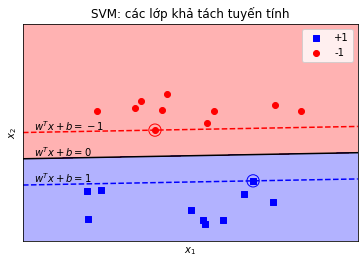

In [27]:
# setting the plot
fig, ax = plt.subplots()
ax.set_title('SVM: các lớp khả tách tuyến tính')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xticks(())
ax.set_yticks(())

# plot the original data
ax.contourf(x,y,z,colors=['r','b'], alpha=0.3)
ax.scatter(X_1_data_1, X_1_data_2, label='+1', marker='s', c='b')
ax.scatter(X_2_data_1, X_2_data_2, label='-1', c='r')
ax.scatter(x_margin_1, y_margin_1, s=150, facecolors='none', edgecolors='b')
ax.scatter(x_margin_2, y_margin_2, s=150, facecolors='none', edgecolors='r')
ax.plot(x,y_0,c='black')
ax.text(x[5],y_0[5]+0.1,r'$w^{T}x+b=0$')
ax.plot(x,y_1,c='b',ls='--')
ax.text(x[5],y_1[5]+0.1,r'$w^{T}x+b=1$')
ax.plot(x,y_2,c='r',ls='--')
ax.text(x[5],y_2[5]+0.1,r'$w^{T}x+b=-1$')
ax.legend()
plt.show()

# Dual Problem